In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the dataset
df = pd.read_csv(r'C:\Users\PRAKASH\OneDrive\Desktop\Churn_Prediction\Churn_Modelling.csv') 

# Display the first 5 rows
print(df.head())

# Basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Data PreProcessing 

In [4]:


# 'RowNumber', 'CustomerId', 'Surname' are identifiers, not useful for prediction
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


Handle missing values

In [5]:
# In case there are missing values (even though this dataset usually doesn't have), we impute
imputer = SimpleImputer(strategy='median')
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = imputer.fit_transform(
    df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
)


Encode categorical variables

In [6]:
# Label encode 'Gender' and 'Geography'
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Female=0, Male=1
df['Geography'] = le.fit_transform(df['Geography'])  # France=0, Germany=1, Spain=2


Feature Scaling

In [ ]:
# Scaling features
scaler = StandardScaler()
features_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


Train-Test Split

In [7]:
# Separate features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Building

In [8]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Model Evaluation

Accuracy: 0.8645

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



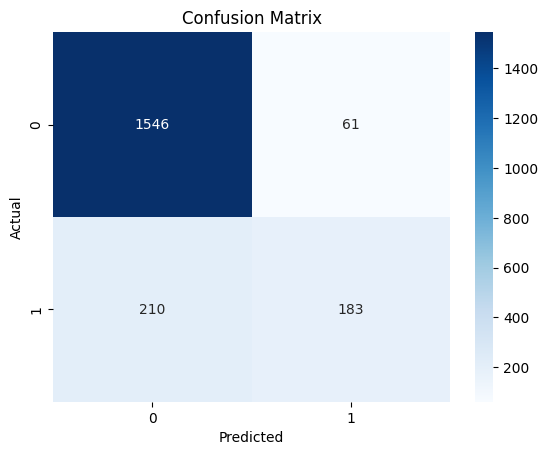

In [9]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


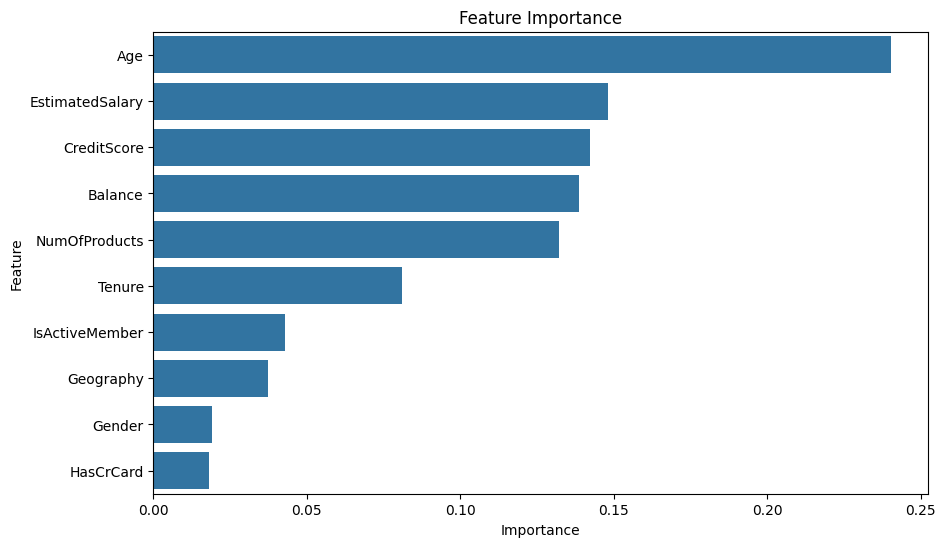

           Feature  Importance
3              Age    0.240453
9  EstimatedSalary    0.148004
0      CreditScore    0.142369
5          Balance    0.138670
6    NumOfProducts    0.132061
4           Tenure    0.080932
8   IsActiveMember    0.042807
1        Geography    0.037402
2           Gender    0.019032
7        HasCrCard    0.018269


In [10]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Display Important Features
print(feature_importance_df)


In [14]:
import pickle

# Save the model
with open('customer_churn_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully using pickle!")


Model saved successfully using pickle!
